<a href="https://colab.research.google.com/github/rajeevak40/Retail_Analytics/blob/main/Brand_Choice_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library


In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import axes as axes
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression

import pickle



# Data Preparation

In [2]:
# Loading data
df_price_elasticity= pd.read_csv('/content/drive/MyDrive/Retail/price_elasticity', index_col=0)
df_purchase=pd.read_csv('/content/drive/MyDrive/Retail/purchase data.csv', index_col=0)
brand_choice= df_purchase[df_purchase['Incidence']==1]
pd.options.display.max_rows=100

In [3]:
brand_choice.head()

,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,,,,,,,,,,,,,,,,,
200000001,28,1,2,2,0,0,1.50,1.90,1.99,2.09,2.67,0,0,0,0,0,0,0,47,1,110866,1,0
200000001,58,1,5,1,0,0,1.39,1.90,1.91,2.12,2.62,1,0,0,0,1,0,0,47,1,110866,1,0
200000001,110,1,1,2,0,0,1.47,1.90,1.99,1.97,2.67,0,0,0,1,0,0,0,47,1,110866,1,0
200000001,142,1,4,1,0,0,1.21,1.35,1.99,2.16,2.68,1,1,0,0,0,0,0,47,1,110866,1,0
200000001,183,1,2,3,0,0,1.46,1.88,1.97,1.89,2.37,1,0,0,1,1,0,0,47,1,110866,1,0


In [4]:
df_price_elasticity.head()

,Price Range,Mean_PE,PE of Segment 0,PE of Segment 1,PE of Segment 2,PE of Segment 3,PE on Promotion,PE on No-Promotion
0,0.50,-0.096396,-0.211169,-0.119088,-0.030921,-0.168042,-0.125732,-0.195644
1,0.51,-0.100464,-0.217739,-0.123271,-0.032688,-0.172967,-0.129848,-0.201765
2,0.52,-0.104659,-0.224417,-0.127548,-0.034541,-0.177962,-0.134043,-0.207989
3,0.53,-0.108984,-0.231204,-0.131919,-0.036486,-0.183027,-0.138318,-0.214316
4,0.54,-0.113442,-0.238099,-0.136386,-0.038526,-0.188165,-0.142674,-0.220747


In [5]:
Y=brand_choice['Brand']

In [6]:
brand_choice.columns.values

array(['Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size'],
      dtype=object)

In [7]:
features=['Price_1', 'Price_2', 'Price_3', 'Price_4','Price_5']
X=brand_choice[features]

In [8]:
brand_choice['Price_1'].mean()


1.384558682880093

## Model creation for price and brand

In [9]:
# Model on brand choice
model_brand_choice=LogisticRegression(solver='sag', multi_class='multinomial')
model_brand_choice.fit(X,Y)



LogisticRegression(multi_class='multinomial', solver='sag')

In [10]:
#Model Interpretation
# Transposing keep features as colums and price as rows
brand_choice_coef =pd.DataFrame(np.transpose(model_brand_choice.coef_)).round(2)
brand_choice_coef.columns=['Brand_1', 'Brand_2', 'Brand_3','Brand_4', 'Brand_5']
brand_choice_coef.index=['Price_1', 'Price_2','Price_3','Price_4','Price_5']
brand_choice_coef

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


## Ownprice Brand Choice Elasticity

Working on Brand 5 as example.


In [11]:
# Creating dataframe
price_range=np.arange(0.5,3.5,0.01)
df_own_brand_5 = pd.DataFrame(index=np.arange(price_range.size))


In [12]:
df_own_brand_5['Price_1']=brand_choice['Price_1'].mean()
df_own_brand_5['Price_2']=brand_choice['Price_2'].mean()
df_own_brand_5['Price_3']=brand_choice['Price_3'].mean()
df_own_brand_5['Price_4']=brand_choice['Price_4'].mean()
df_own_brand_5['Price_5']=price_range
df_own_brand_5.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54


In [13]:
#Predict probability of Brabd 5
predict_brand_5=model_brand_choice.predict_proba(df_own_brand_5)
pr_own_brand_5= predict_brand_5[:][:,4]
beta_5=brand_choice_coef.iloc[4,4]
beta_5

-1.09

In [14]:
# PE for Brand 5
own_brand_5_pe = beta_5*price_range*(1-pr_own_brand_5)
df_price_elasticity['Brand_5']= own_brand_5_pe
pd.options.display.max_info_rows=None
df_price_elasticity

,Price Range,Mean_PE,PE of Segment 0,PE of Segment 1,PE of Segment 2,PE of Segment 3,PE on Promotion,PE on No-Promotion,Brand_5
0,0.50,-0.096396,-0.211169,-0.119088,-0.030921,-0.168042,-0.125732,-0.195644,-0.049056
1,0.51,-0.100464,-0.217739,-0.123271,-0.032688,-0.172967,-0.129848,-0.201765,-0.050617
2,0.52,-0.104659,-0.224417,-0.127548,-0.034541,-0.177962,-0.134043,-0.207989,-0.052207
3,0.53,-0.108984,-0.231204,-0.131919,-0.036486,-0.183027,-0.138318,-0.214316,-0.053827
4,0.54,-0.113442,-0.238099,-0.136386,-0.038526,-0.188165,-0.142674,-0.220747,-0.055477
...,...,...,...,...,...,...,...,...,...
295,3.45,-8.012897,-5.051673,-5.680837,-12.541785,-4.022022,-4.861622,-4.983237,-3.231572
296,3.46,-8.038147,-5.068529,-5.700994,-12.578702,-4.036889,-4.879824,-5.000143,-3.247766
297,3.47,-8.063363,-5.085366,-5.721114,-12.615602,-4.051739,-4.897996,-5.017029,-3.263928
298,3.48,-8.088544,-5.102185,-5.741197,-12.652486,-4.066574,-4.916137,-5.033896,-3.280057


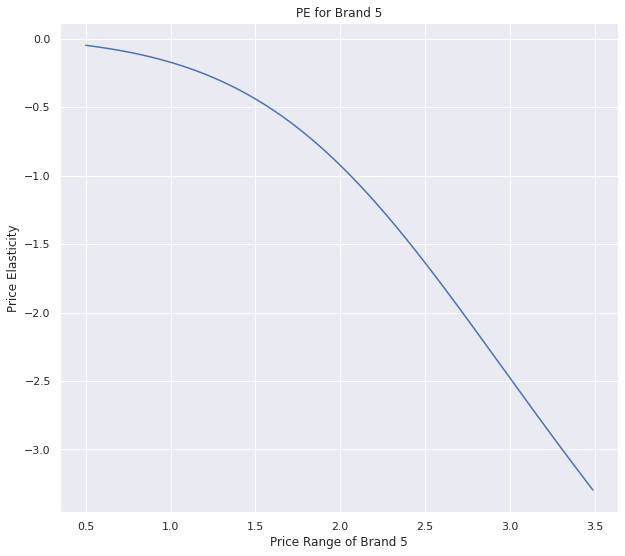

In [15]:
# Ploting Brand 5 Price Elasticity
plt.figure(figsize=(10,9))
plt.plot(price_range,own_brand_5_pe)
plt.title('PE for Brand 5')
plt.xlabel('Price Range of Brand 5')
plt.ylabel('Price Elasticity')
plt.show()

## Own and Cross-Price Elasticity by Segment

In [16]:
df_brand_5_cross_brand4 = pd.DataFrame(index=np.arange(price_range.size))
df_brand_5_cross_brand4['Price_1']=brand_choice['Price_1'].mean()
df_brand_5_cross_brand4['Price_2']=brand_choice['Price_2'].mean()
df_brand_5_cross_brand4['Price_3']=brand_choice['Price_3'].mean()
df_brand_5_cross_brand4['Price_4']=price_range
df_brand_5_cross_brand4['Price_5']=brand_choice['Price_5'].mean()
df_brand_5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [17]:
predict_brand5_cross_brand4=model_brand_choice.predict_proba(df_brand_5_cross_brand4)

In [22]:
predict_prob_brand4=predict_brand5_cross_brand4[:][:,3]

In [24]:
brand_5_cross_brand_4_pe=-beta_5 *price_range*predict_prob_brand4

In [26]:
df_price_elasticity['Brand_5_Cross_Brand_4']= brand_5_cross_brand_4_pe


In [30]:
pd.options.display.max_info_rows=None
df_price_elasticity

,Price Range,Mean_PE,PE of Segment 0,PE of Segment 1,PE of Segment 2,PE of Segment 3,PE on Promotion,PE on No-Promotion,Brand_5,Brand_5_Cross_Brand_4
0,0.50,-0.096396,-0.211169,-0.119088,-0.030921,-0.168042,-0.125732,-0.195644,-0.049056,0.332012
1,0.51,-0.100464,-0.217739,-0.123271,-0.032688,-0.172967,-0.129848,-0.201765,-0.050617,0.337288
2,0.52,-0.104659,-0.224417,-0.127548,-0.034541,-0.177962,-0.134043,-0.207989,-0.052207,0.342507
3,0.53,-0.108984,-0.231204,-0.131919,-0.036486,-0.183027,-0.138318,-0.214316,-0.053827,0.347669
4,0.54,-0.113442,-0.238099,-0.136386,-0.038526,-0.188165,-0.142674,-0.220747,-0.055477,0.352773
...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.012897,-5.051673,-5.680837,-12.541785,-4.022022,-4.861622,-4.983237,-3.231572,0.162233
296,3.46,-8.038147,-5.068529,-5.700994,-12.578702,-4.036889,-4.879824,-5.000143,-3.247766,0.160333
297,3.47,-8.063363,-5.085366,-5.721114,-12.615602,-4.051739,-4.897996,-5.017029,-3.263928,0.158447
298,3.48,-8.088544,-5.102185,-5.741197,-12.652486,-4.066574,-4.916137,-5.033896,-3.280057,0.156576


## Brand Elasticity and Cross Brand Elasticty Segmentwise 
1. Filter purchase incident
2. Filter segment of choice
3. Repeate steps in find brand and cross brans elasticity